In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from mpl_toolkits.mplot3d import Axes3D

## SVD

In [ ]:
# Matrix
A = [[3,0,5],[8,1,3]]

U,S,Vt = np.linalg.svd(A)

print(U)
print(S)#sorted hunxa
print(Vt)


[[-0.52138438 -0.85332193]
 [-0.85332193  0.52138438]]
[9.89086518 3.18916698]
[[-0.84833111 -0.08627374 -0.52238986]
 [ 0.50518185  0.16348607 -0.84738634]
 [-0.15851066  0.98276607  0.09510639]]


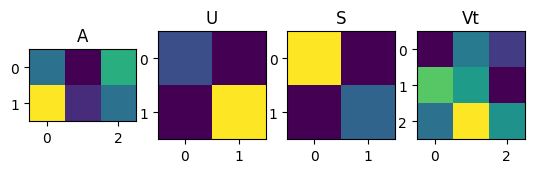

In [ ]:
plt.subplot(1,4,1)
plt.imshow(A)
plt.title('A')

plt.subplot(1,4,2)
plt.imshow(U)
plt.title('U')

plt.subplot(1,4,3)
plt.imshow(np.diag(S))
plt.title('S')

plt.subplot(1,4,4)
plt.imshow(Vt)
plt.title('Vt')
plt.show()

### code challenge: ED vs SVD

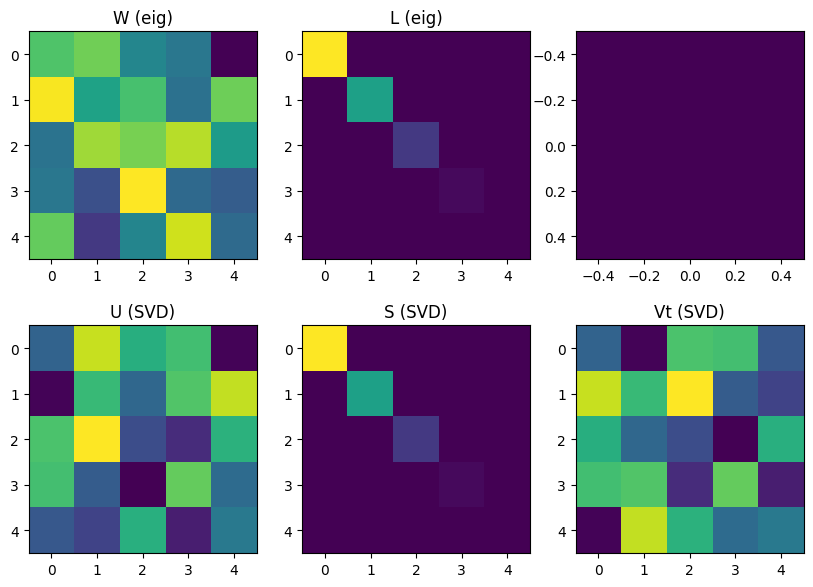

In [ ]:
# matrix 
A = np.random.randn(5,5)
A = A.T@A

# compute eig and svd
L,W = np.linalg.eig(A)
U,s,Vt = np.linalg.svd(A)

# sort eig outputs
sidx = np.argsort(L)[::-1]#decending
L = L[sidx]
W = W[:,sidx]

# plot
fig, ax = plt.subplots(2,3,figsize=(10,7))
ax[0,0].imshow(W)
ax[0,0].set_title('W (eig)')

ax[0,1].imshow(np.diag(L))
ax[0,1].set_title('L (eig)') #eigen value

ax[0,2].imshow(np.zeros((1,1)))

#svd ko plot
ax[1,0].imshow(U)
ax[1,0].set_title('U (SVD)')

ax[1,1].imshow(np.diag(s))
ax[1,1].set_title('S (SVD)')

ax[1,2].imshow(Vt)
ax[1,2].set_title('Vt (SVD)')

plt.show()

In [ ]:
# compare U and V
print(np.round(U-Vt.T,4)) # for symmetric matrix, U and V are same

[[-0.  0. -0.  0.  0.]
 [-0. -0.  0. -0.  0.]
 [ 0.  0. -0. -0. -0.]
 [-0. -0. -0.  0.  0.]
 [-0. -0.  0.  0. -0.]]


In [ ]:
# compare U and W
print(np.round(U- -W,4)) #sign flip gardai herne, diff cols are zeros # Thus they are same

[[ 0.      0.9165 -0.      0.     -1.5856]
 [-0.      0.2535  0.     -0.      0.8988]
 [ 0.      1.1518  0.     -0.      0.1659]
 [-0.     -0.8078 -0.      0.     -0.6425]
 [-0.     -1.0566 -0.      0.     -0.4876]]


## Relation betn Singular value and eigen value

In [ ]:
#case 1: eig(AtA) vs svd(A)**2

A = np.array([[3,1,0],[1,1,0]])

print(np.sort(np.linalg.eig(A.T@A)[0]))
print(np.sort(np.linalg.svd(A)[1])**2) #They are same

[ 0.          0.34314575 11.65685425]
[ 0.34314575 11.65685425]


In [ ]:
#Case 2: eig(AtA) vs. svd(AtA)
print(np.sort(np.linalg.eig(A.T@A)[0]))
print(np.sort(np.linalg.svd(A.T@A)[1])) # They are  same

[ 0.          0.34314575 11.65685425]
[ 0.          0.34314575 11.65685425]


In [ ]:
# case 3a: eig(A) vs. svd(A), real valued eigs

#need some square matrix for eig
A = [[3,1,0],[1,1,0],[1,1,1]]

print(np.sort(np.linalg.eig(A)[0]))
print(np.sort(np.linalg.svd(A)[1]))# No trival relation


[0.58578644 1.         3.41421356]
[0.49384652 1.10038368 3.68039011]


In [ ]:
# case 3a: eig(A) vs. svd(A), complex valued eigs

#need some square matrix for eig
A = np.random.randn(3,3)

print(np.sort(np.linalg.eig(A)[0]))
print(np.sort(np.linalg.svd(A)[1]))#no trival reln

[-1.25732909 -1.04153777  0.40936928]
[0.20131698 1.21659904 2.18882664]




```
AtA (symmetric matrix) has same eigen and singular value.
A[non symmetric matrix) has different eigen and singular values.

Singular values are always real valued.

Eigen values can be real and complex valued.
```



### code challenge: U from eigendecomposition of A

In [ ]:
A = np.random.randn(3,6)
AtA = A.T@A

#svd
Us,Ss,Vs = np.linalg.svd(A)
#eig
L,V = np.linalg.eig(AtA)

#sort eigen sol
sidx=np.argsort(L)[::-1]
L = L[sidx]
V = V[:,sidx]

In [ ]:
#Conform V = Vs
print(np.round(V- -Vs.T,2)) # sign flip gardai herne # some columns seem to be zero



[[-0.    0.    1.13  0.37  1.22  0.61]
 [ 0.    0.    0.59 -0.39 -1.   -0.47]
 [ 0.    0.   -0.16  0.44 -0.14 -1.22]
 [-0.   -0.    0.17  0.43 -0.04 -0.33]
 [ 0.   -0.   -1.    0.59  1.01 -0.59]
 [ 0.   -0.   -1.15 -0.34 -0.18  0.99]]


In [ ]:
#Relation of Ss and L
print(L)
print(Ss**2)

[ 1.04503553e+01  4.67410716e+00  1.23416759e+00  4.59619059e-16
  2.25450895e-16 -2.76483158e-16]
[10.45035526  4.67410716  1.23416759]


In [ ]:
# Create U using only A,V,L
U = np.zeros((3,3))
for i in range(3):
  U[:,i] += A@V[:,i].T / np.sqrt(L[i])

#conform that U == Us
print(np.round(U- -Us,2)) #sign flip gardai herne

[[ 0.    0.    1.81]
 [ 0.   -0.    0.56]
 [ 0.    0.   -0.64]]


### code challenges: AtA, Av, singular values

In [ ]:
m = 4
A = np.random.randn(m,m)
AtA = A.T@A
AAt = A@A.T

U,S,V = np.linalg.svd(AtA)

diffs = np.zeros(m)
for i in range(m):
  diffs[i] = sum( (AAt@A@U[:,i] - A@U[:,i]*S[i]))

print(np.round(diffs,4)) # Hence proved.

[ 0.  0. -0.  0.]


## Spectral theory of matrices

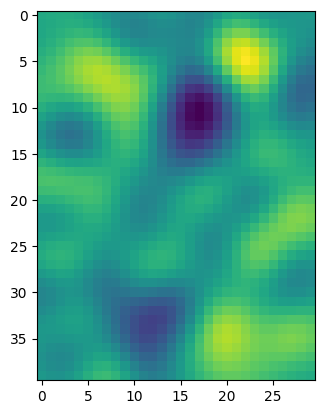

In [ ]:
#matrix size
m = 40
n = 30

#define a 2D Gaussian for smoothing
k = int((m+n)/4)
xx = np.linspace(-3,3,k)
[X,Y] = np.meshgrid(xx,xx)
g2d = np.exp(-(X**2 + Y**2) / (k/8)) # Gaussian formula

# matrix
A = scipy.signal.convolve2d(np.random.randn(m,n),g2d,'same')

plt.imshow(A)
plt.show()


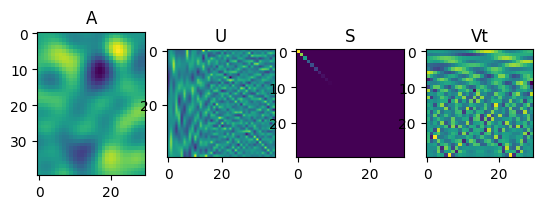

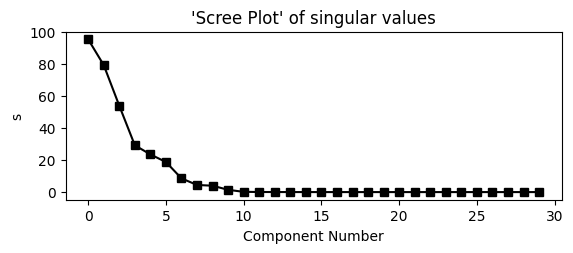

In [ ]:
#SVD

U,S,V = np.linalg.svd(A)

plt.subplot(1,4,1)
plt.imshow(A)
plt.title('A')

plt.subplot(1,4,2)
plt.imshow(U)
plt.title('U')

plt.subplot(1,4,3)
plt.imshow(np.diag(S))
plt.title('S')

plt.subplot(1,4,4)
plt.imshow(V)
plt.title('Vt')
plt.show()

plt.subplot(2,1,1)
plt.plot(S,'ks-')
plt.xlabel('Component Number')
plt.ylabel('s')
plt.title("'Scree Plot' of singular values")

plt.show()


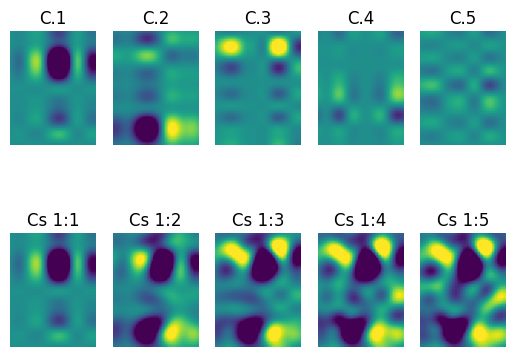

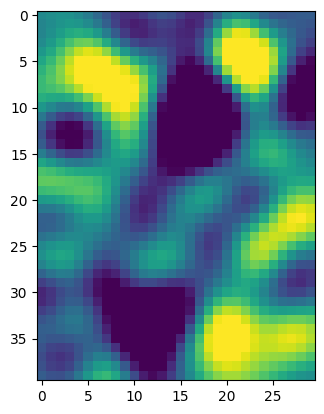

In [ ]:
# Reconstruct matrix A using some of the eigenvalues only. (Reduced rank matrix)

rank1mats = np.zeros((5,m,n))

for i in range(0,5):

    #create rank1 matrix
    rank1mats[i,:,:] = np.outer( U[:,i]*S[i],V[i,:] )

    plt.subplot2grid((2,5),(0,i))
    plt.imshow(rank1mats[i,:,:],vmin=-5,vmax=5)
    plt.axis('off')
    plt.title('C.%d' %(i+1))


    plt.subplot2grid((2,5),(1,i))
    imdat = np.sum(rank1mats[:i+1,:,:],axis=0)
    plt.imshow(imdat,vmin=-5,vmax=5)
    plt.axis('off')
    plt.title('Cs 1:%d' %(i+1))

plt.show()

plt.imshow(A,vmin=-5, vmax=5)



## SVD for low-rank approximations

rank= 5


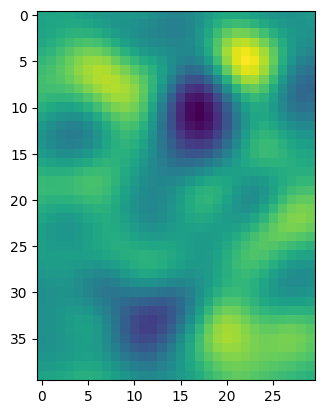

In [ ]:
# Reconstruct reduced rank matrix using only 5 components
ncomps = 5

#reduced matrices
Ur = U[:,0:ncomps] #first 5 columns of U
Sr = S[0:ncomps] # first 5 eigen value
Vr = V[0:ncomps,:]#first 5 rows of Vt

# low rank approximation
reconImage = Ur @ np.diag(Sr) @ Vr
plt.imshow(reconImage)

#rank
print('rank=', np.linalg.matrix_rank(reconImage))


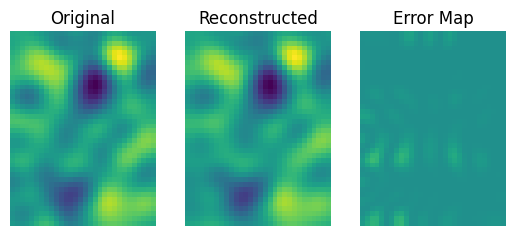

In [ ]:
# Error map and percent difference from original matrix
errormap = (reconImage - A)**2 # pixel wise difference

# show results
plt.subplot(131)
plt.imshow(A)
plt.axis('off')
plt.title('Original')

plt.subplot(132)
plt.imshow(reconImage)
#plt.colorbar()
plt.axis('off')
plt.title('Reconstructed')

plt.subplot(133)
plt.imshow(errormap, vmin=-15, vmax=15) #alter the values here
plt.axis('off')
plt.title('Error Map')

plt.show()

## Convert singular values to percent variance

In [ ]:
# Matrix
m = 40
n = 30

# define 2d gaussian for smoothing
k = int( (m+n)/4 )
xx = np.linspace(-3,3,k)
[X,Y] = np.meshgrid(xx,xx)
g2d = np.exp( -(X**2 + Y**2)/ (k/8))

# matrix
A = scipy.signal.convolve2d(np.random.randn(m,n),g2d,'same')

<ipython-input-5-c9bd107700b7>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


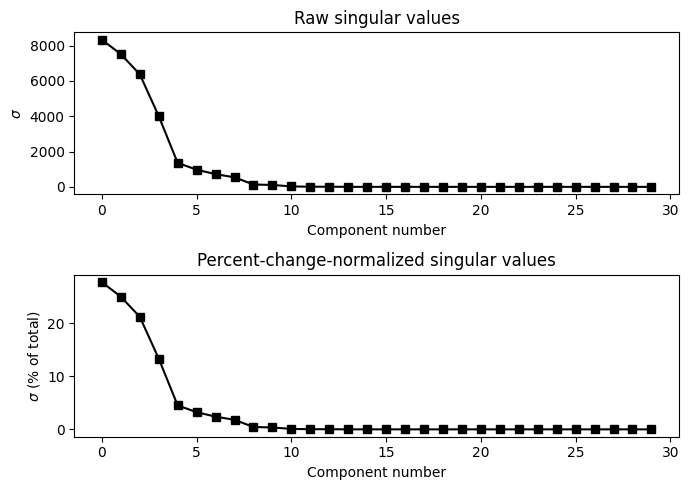

In [ ]:
Ascaled = A*100 # change this and see the differences

# SVD
U,s,V = np.linalg.svd(Ascaled)

# convert to percent variance
spct = 100*s/np.sum(s)

# plot the singular values for comparison
fig = plt.subplots(1,figsize=(7,5))

plt.subplot(211)
plt.plot(s,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('Raw singular values')

plt.subplot(212)
plt.plot(spct,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$ (% of total)')
plt.title('Percent-change-normalized singular values')

plt.tight_layout()
plt.show()



### code challenge: When is U@V.t valid? What is its norm and is it orthogonal?

In [ ]:
A = np.random.randn(5,5)

U,S,Vt = np.linalg.svd(A)

print(np.linalg.norm(U,2))# Two norm: How much this matrix U will stretch or shrink or remain same or leave  another vector w ,when we do U@w
print(np.linalg.norm(Vt,2))


print(np.linalg.norm(U@Vt,2))

#conclusion: orthogonal matrix(ie, pure rotation matrix) has 2-norm 1

1.0000000000000002
0.9999999999999999
1.0


In [ ]:
#compute 
print(np.round(U@U.T,3))
print(np.round(Vt.T@Vt,3))

# conclusion: identity matrix raixa. Thus, they are orthogonal on their own

[[ 1.  0.  0.  0. -0.]
 [ 0.  1.  0. -0. -0.]
 [ 0.  0.  1.  0.  0.]
 [ 0. -0.  0.  1. -0.]
 [-0. -0.  0. -0.  1.]]
[[ 1.  0. -0.  0.  0.]
 [ 0.  1.  0. -0.  0.]
 [-0.  0.  1. -0. -0.]
 [ 0. -0. -0.  1.  0.]
 [ 0.  0. -0.  0.  1.]]


In [ ]:
print(np.round(U@Vt,3))# U and Vt are orthogonal matrix on their own but they are two different orthogonal matrix(ie, two diff ways to rotate a matrix)
                       # Hence, they are not identity matrix when computing dot product.
C = U@Vt
print(np.round(C@C.T,3)) # This is orthogonal


[[ 0.768 -0.147  0.486  0.288 -0.264]
 [ 0.078 -0.674 -0.569 -0.019 -0.464]
 [-0.096 -0.695  0.393 -0.282  0.523]
 [ 0.599  0.188 -0.36  -0.624  0.296]
 [-0.19   0.074  0.395 -0.67  -0.595]]
[[ 1. -0.  0.  0. -0.]
 [-0.  1.  0. -0. -0.]
 [ 0.  0.  1.  0.  0.]
 [ 0. -0.  0.  1. -0.]
 [-0. -0.  0. -0.  1.]]


## SVD, matrix inverse, and pseudoinverse

In [ ]:
#Matrix (rank 2)
A = [[1,2,3],
     [1,2,4],
     [1,2,5]]

#svd 
U,S,V = np.linalg.svd(A)

#pseudoinverse of s
nonzeroels = S>10**-14 #find non zero elements
S[nonzeroels] = 1/S[nonzeroels]

#pseudo inverse of A
Ainv = V.T@np.diag(S)@U.T #v.T = V hunxa

print(Ainv@A) # its close to I

print(np.linalg.pinv(A)@A)#method 2

[[2.00000000e-01 4.00000000e-01 3.33066907e-16]
 [4.00000000e-01 8.00000000e-01 8.88178420e-16]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[ 2.00000000e-01  4.00000000e-01  6.10622664e-16]
 [ 4.00000000e-01  8.00000000e-01  4.44089210e-16]
 [-5.55111512e-17 -1.11022302e-16  1.00000000e+00]]


In [ ]:
import inspect
lines = inspect.getsource(np.linalg.pinv)
print(lines)


@array_function_dispatch(_pinv_dispatcher)
def pinv(a, rcond=1e-15, hermitian=False):
    """
    Compute the (Moore-Penrose) pseudo-inverse of a matrix.

    Calculate the generalized inverse of a matrix using its
    singular-value decomposition (SVD) and including all
    *large* singular values.

    .. versionchanged:: 1.14
       Can now operate on stacks of matrices

    Parameters
    ----------
    a : (..., M, N) array_like
        Matrix or stack of matrices to be pseudo-inverted.
    rcond : (...) array_like of float
        Cutoff for small singular values.
        Singular values less than or equal to
        ``rcond * largest_singular_value`` are set to zero.
        Broadcasts against the stack of matrices.
    hermitian : bool, optional
        If True, `a` is assumed to be Hermitian (symmetric if real-valued),
        enabling a more efficient method for finding singular values.
        Defaults to False.

        .. versionadded:: 1.17.0

    Returns
    -------
    

## Condition number of a matrix

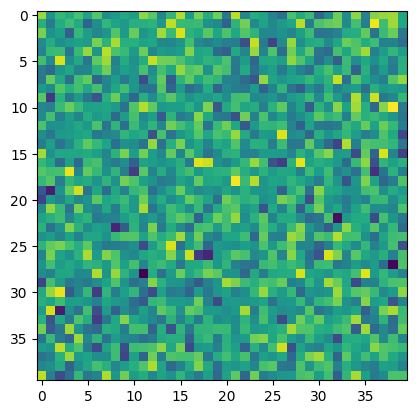

In [ ]:
# matrix
m = 40

#define 2d gaussian for smotthing
k = int( (m+m)/4)
xx = np.linspace(-3,3,k)
[X,Y] = np.meshgrid(xx,xx)
g2d = np.exp( -(X**2 + Y**2)/ (k/8))

#matrix
A = np.random.randn(m,m)#with only this condition number is very low
#A = scipy.signal.convolve2d(A,g2d,'same')# with this condition number increases

plt.imshow(A)
plt.show()

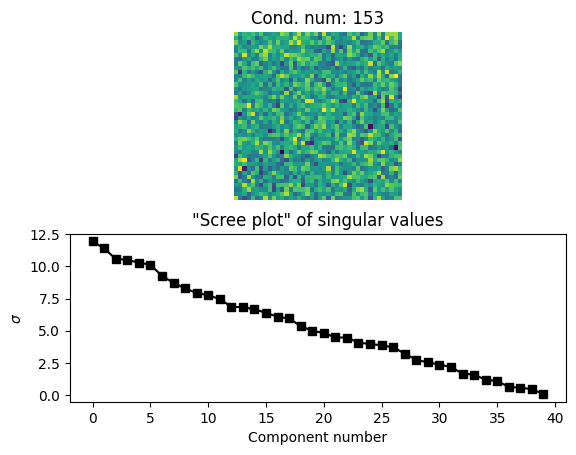

In [ ]:
#SVD
S = np.linalg.svd(A)[1]

# compute condition number
condnum = S[0]/S[-1]

#show matrix
plt.subplot(2,1,1)
plt.imshow(A)
plt.axis('off')
plt.title('Cond. num: %d' %condnum)

plt.subplot(212)
plt.plot(S,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('"Scree plot" of singular values')

plt.show()

4.0


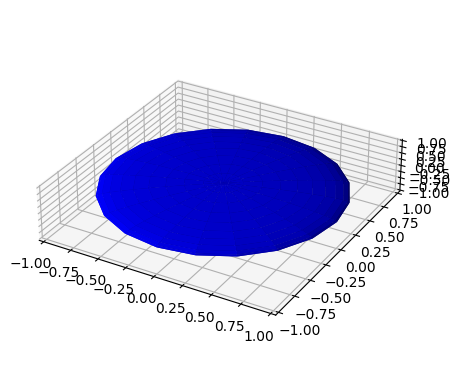

In [ ]:
#sphere
# the transformation matrix T
T = np.eye(3)
T[-1,-1] = .25    #last ko singular value ho, we can change and see the difference

#condition number
condnum = T[0,0]/T[-1,-1]
print(condnum)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data
n = 21
u = np.linspace(0, 2*np.pi,n)
v = np.linspace(0, np.pi,n)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# put coords in a matrix to be transformed
M = np.concatenate( (np.reshape(x,(n*n,1)),np.reshape(y,(n*n,1)),np.reshape(z,(n*n,1))) ,axis=1)

# apply the transformation matrix to the coordinates
TM = T@M.T

# get out the new coordinates
xp = np.reshape(TM[0,:],(n,n))
yp = np.reshape(TM[1,:],(n,n))
zp = np.reshape(TM[2,:],(n,n))

# Plot the surface
ax.plot_surface(xp,yp,zp, color='b')
ax.axis('square')
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)

plt.show()

### code challenge: Create matrix with desired condition number

In [ ]:
m = 6
n = 6
condnum = 41.99

#Create singular value matrix
s = np.linspace(condnum,1,np.min([m,n]))
print(s)

S = np.zeros((m,n))
for i in range(len(s)):
    S[i,i] = s[i]

print(S)  

#method 2
s2 = np.diag(np.linspace(condnum,1,np.min([m,n])))
print(s2) 

#create left and right singular vector
U, junk = np.linalg.qr(np.random.randn(m,m))
V, junk = np.linalg.qr(np.random.randn(n,n))
print(U,V)

[41.99  33.792 25.594 17.396  9.198  1.   ]
[[41.99   0.     0.     0.     0.     0.   ]
 [ 0.    33.792  0.     0.     0.     0.   ]
 [ 0.     0.    25.594  0.     0.     0.   ]
 [ 0.     0.     0.    17.396  0.     0.   ]
 [ 0.     0.     0.     0.     9.198  0.   ]
 [ 0.     0.     0.     0.     0.     1.   ]]
[[41.99   0.     0.     0.     0.     0.   ]
 [ 0.    33.792  0.     0.     0.     0.   ]
 [ 0.     0.    25.594  0.     0.     0.   ]
 [ 0.     0.     0.    17.396  0.     0.   ]
 [ 0.     0.     0.     0.     9.198  0.   ]
 [ 0.     0.     0.     0.     0.     1.   ]]
[[-0.08870169 -0.28141341  0.12847733 -0.5756903   0.15271847 -0.73599581]
 [ 0.63391308 -0.28527743  0.4161073  -0.41090704 -0.07090259  0.41201206]
 [-0.03430895  0.1920062  -0.70855306 -0.61623716 -0.0651047   0.27553988]
 [-0.33672599  0.16473395  0.26620883 -0.17457642  0.8065748   0.32798073]
 [-0.5766899   0.18668957  0.44882164 -0.28475615 -0.5628262   0.18241575]
 [-0.37835629 -0.86056181 -0.1897178   

In [ ]:
#now create a matrix
A = U@S@V.T
condnum = np.linalg.cond(A)
print(A)
print(condnum)

[[-1.55611779e+00 -2.54153090e+00  3.06997969e+00 -1.38485306e+01
   6.27294471e+00  8.62736292e+00]
 [-1.02093419e+01  9.28420841e+00  4.95246230e+00  1.81690914e+01
   1.97278617e+01 -7.71849260e+00]
 [-8.97076042e+00  8.38371787e+00  4.46088110e+00  9.41614166e+00
  -3.90878650e+00  2.62224686e+00]
 [ 1.57833166e+01 -4.33832416e+00 -4.92318883e+00  3.29486342e+00
   1.26275791e+01  1.02799472e+00]
 [ 5.79435645e+00 -1.62337014e+01  2.53148367e+01 -1.19876985e-01
   9.71797459e+00 -1.54034521e+01]
 [ 5.44091609e+00 -1.06083209e+01  2.15819744e-02 -7.29465541e+00
   1.93849246e+01 -6.69462283e+00]]
41.99000000000019


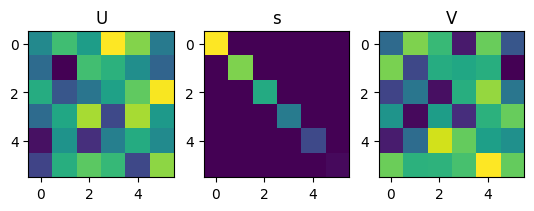

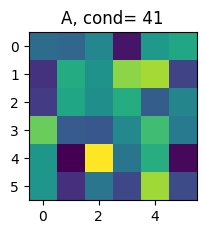

In [ ]:
plt.subplot(131)
plt.imshow(U)
plt.title('U')

plt.subplot(132)
plt.imshow(S)
plt.title('s')

plt.subplot(133)
plt.imshow(V)
plt.title('V')

plt.show()

plt.subplot(211)
plt.imshow(A)
plt.title('A, cond= %d' %condnum)

plt.show()



### code challenge: why  avoid inverse?

Number of matrix: 70


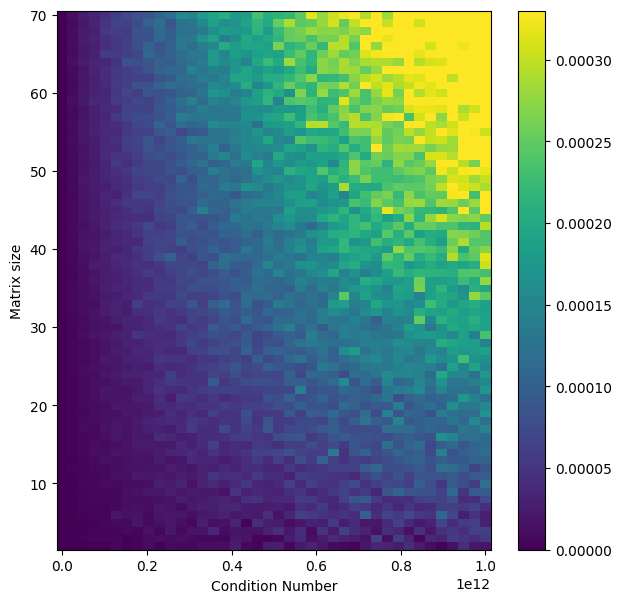

In [ ]:
#matrix sizes
matrixSizes = np.arange(2,71)

#condition number
condnum = np.linspace(10,1e12,40)#40 condition numbers 

invDiffs = np.zeros((len(matrixSizes),len(condnum)))

count = 1
for mi, M in enumerate(matrixSizes):
    count+= 1
    for ci, C in enumerate(condnum):

        #Create A
        U = np.linalg.qr(np.random.randn(M,M))[0]
        V = np.linalg.qr(np.random.randn(M,M))[0]
        S = np.diag(np.linspace(C,1,M))
        A = U@S@V
        

        # compute difference from identity matrix
        I = A@np.linalg.inv(A)
        Idiff= np.abs(I-np.eye(M))

        #norm of the Matrix
        invDiffs[mi,ci] = np.linalg.norm(Idiff)

print('Number of matrix:',count)

#visualize
fig = plt.figure(figsize=(7,7))
plt.pcolor(condnum,matrixSizes,invDiffs,vmax=np.max(invDiffs)*.6)#we show invDiffs
plt.xlabel('Condition Number')
plt.ylabel('Matrix size')
plt.colorbar()

plt.show()



```
here,  Color bar represents norm

Conclusion: Inv for large matrix is unstable

```

